<a href="https://colab.research.google.com/github/Parth354/ML_Models/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:, 1:-1].values
Y= dataset.iloc[:,-1].values

In [5]:
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Scaling The input and Output both Necessary as the gap b/w them is large

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
Y=Y.reshape(len(Y),1)
sc_Y = StandardScaler()
X= sc_X.fit_transform(X)
Y= sc_Y.fit_transform(Y)

In [7]:
print(X)
print(Y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Trainning The SVR Model

In [8]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting Y and going back to the original form before the scale

In [9]:
sc_Y.inverse_transform(regressor.predict([[6.5]]).reshape(-1,1))

array([[252789.13921624]])

Visualising the SVR Model

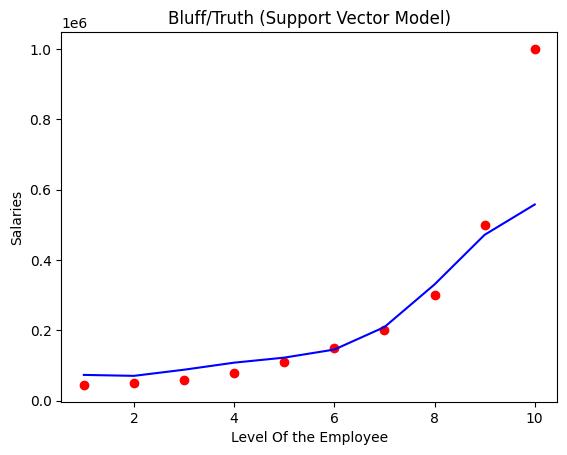

In [10]:
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y), color='red')
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')
plt.title('Bluff/Truth (Support Vector Model)')
plt.xlabel('Level Of the Employee')
plt.ylabel('Salaries')
plt.show()

Visualising the Model In hIgher Resolution

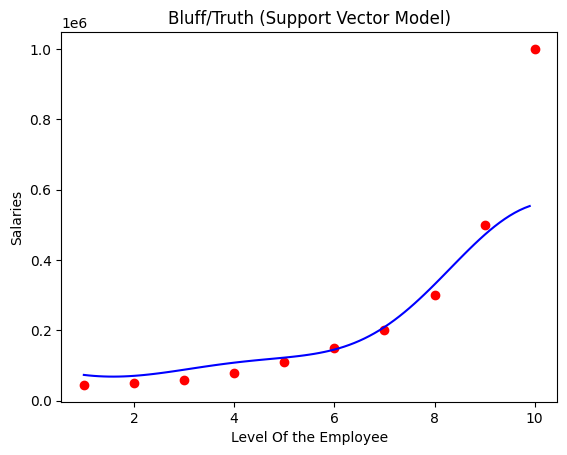

In [14]:
X_grid=np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y), color='red')
plt.plot(X_grid,sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue')
plt.title('Bluff/Truth (Support Vector Model)')
plt.xlabel('Level Of the Employee')
plt.ylabel('Salaries')
plt.show()